<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name:Sreekar Lanka

EID:SL

Name:Rishabh Tiwari

EID:rt27739

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

Advantages of catboost over XG boost
1)It focuses on optimizing decision trees for categorical variables, or variables whose different values may have no relation with each other (eg. apples and oranges) as it determines different categories automatically with no need for preprocessing
2)It is faster in training the model and predicitng the outputs beacuse of its use of symmetric tress i.e the split is always made by retaining the same condition as previous. Hence it helps in avoiding overfitting 

Disdvantages:
1) CatBoost’s internal identification of categorical data slows its training time a little 
2) Tuning of hyperparameters is complicated and might be tedious 

# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [2]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [3]:
data.shape

(5000, 11)

In [4]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In [5]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,0.050895,28,0,0.307791,6250.0,9,0,2,0,0.0
4996,0.049799,33,0,0.530426,15200.0,11,0,3,0,0.0
4997,0.423173,47,0,0.356478,5904.0,11,0,2,0,3.0
4998,1.000000,29,0,0.314842,2054.0,2,0,1,0,0.0


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
%matplotlib inline

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt

In [7]:
columns_list = list(X.columns)

In [7]:
# Part a)
#defining the model
clf = DecisionTreeClassifier(random_state = 14)
#fitting the model
clf.fit(X_train, y_train)
test_pred_decision_tree = clf.predict(X_test)
test_probs = clf.predict_proba(X_test)[:,1]
#accuracy score of the model
print("Tree accuracy score:",accuracy_score(y_test, test_pred_decision_tree))
# roc_auc_score of the model
print("Decision Trees ROC score:", roc_auc_score(y_test, test_probs))

Tree accuracy score: 0.888
Decision Trees ROC score: 0.5854582176218127


In [8]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(X))
#print the result
print(tree_rules)

|--- RevolvingUtilizationOfUnsecuredLines <= 0.75
|   |--- NumberOfTimes90DaysLate <= 0.50
|   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.40
|   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 42.00
|   |   |   |   |--- NumberOfTime30-59DaysPastDueNotWorse <= 1.50
|   |   |   |   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.50
|   |   |   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.17
|   |   |   |   |   |   |   |--- NumberRealEstateLoansOrLines <= 5.50
|   |   |   |   |   |   |   |   |--- NumberOfDependents <= 2.50
|   |   |   |   |   |   |   |   |   |--- age <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- NumberRealEstateLoansOrLines <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- NumberRealEstateLoansOrLines >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- age >  29.50
|   |   |   |   |   |  

In [10]:
# Part b)
from sklearn.svm import SVC
clf_bagging = BaggingClassifier(base_estimator=clf, n_estimators = 25,random_state = 14)
clf_bagging.fit(X_train, y_train)
test_pred_bagging = clf_bagging.predict(X_test)
y_probs_bagging = clf_bagging.predict_proba(X_test)[:,1]

#accuracy score of the model
print("Bagging Decision Trees accuracy score:", accuracy_score(y_test, test_pred_bagging))
#roc_auc_score of the model
print("Bagging Decision Trees ROC score:",roc_auc_score(y_test,y_probs_bagging))


Bagging Decision Trees accuracy score: 0.932
Bagging Decision Trees ROC score: 0.5


In [47]:
# Part c)
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
grid_rf = GridSearchCV(clf,param_grid)
fitted_rf= grid_rf.fit(X_train, y_train)

# print(clf_rf.best_params_)
# print(clf_rf.best_score_)




In [48]:
fitted_rf.best_params_

{'criterion': 'entropy',
 'max_features': 1,
 'n_estimators': 100,
 'random_state': 17}

In [52]:
#confusion matrix 

y_pred_rf = fitted_rf.predict(X_test)
y_probs_rf = fitted_rf.predict_proba(X_test)[:,1]

cm_rf = confusion_matrix(y_test,y_pred_rf)
print(cm_rf)
#ROC score
print("Random Forest ROC score:",roc_auc_score(y_test,y_probs_rf))
# Accuracy
print("Random Forest Accuracy score",accuracy_score(y_test,y_pred_rf))




[[1162    3]
 [  82    3]]
Random Forest ROC score: 0.8375612219136582
Random Forest Accuracy score 0.932


In [57]:
# Part d)

clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }


# Grid search
clf_adaboost = GridSearchCV(clf,param_grid)
clf_adb = clf_adaboost.fit(X_train,y_train)

print("Best Params are:", clf_adb.best_params_)



Best Params are: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}


In [64]:
#Predicting adaboost on test data
y_pred_adaboost = clf_adb.best_estimator_.predict(X_test)
y_probs_adaboost = clf_adb.predict_proba(X_test)[:,1]

#confusion matrix 
print("confusion matrix for adaboost:", confusion_matrix(y_test,y_pred_adaboost))
print("ROC AUC score for adaboost:", roc_auc_score(y_test,y_probs_adaboost))
print("accuracy score for adaboost:", accuracy_score(y_test,y_pred_adaboost))


confusion matrix for adaboost: [[1153   12]
 [  72   13]]
ROC AUC score for adaboost: 0.8390254986114618
accuracy score for adaboost: 0.9328


In [68]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }
# Grid search
clf_gradientboosting = GridSearchCV(clf,param_grid)
clf_grad = clf_gradientboosting.fit(X_train,y_train)

clf_grad.best_params_



{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}

In [72]:
y_pred_grad = clf_grad.best_estimator_.predict(X_test)
y_probs_grad = clf_grad.predict_proba(X_test)[:,1]

print("confusion matrix for gradient boosting:",confusion_matrix(y_test,y_pred_grad))
print("ROC AUC score for gradient boosting:", roc_auc_score(y_test,y_probs_grad))
print("Accuracy for gradient boosting:", accuracy_score(y_test,y_pred_grad))


confusion matrix for gradient boosting: [[1164    1]
 [  84    1]]
ROC AUC score for gradient boosting: 0.8366372128250441
Accuracy for gradient boosting: 0.932


In [2]:
# Part f)

## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
#import xgboost

%matplotlib inline

In [16]:
%pip install xgboost
import xgboost


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.802 s
predict time 0.004 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.78 s
predict time 0.004 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.742 s
predict time 0.004 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



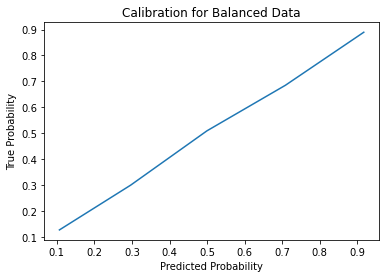

In [18]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)

prob_true, prob_pred = calibration_curve(y_test1, y_pred_proba1)
plt.plot(prob_pred,prob_true)
plt.title('Calibration for Balanced Data')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.show()

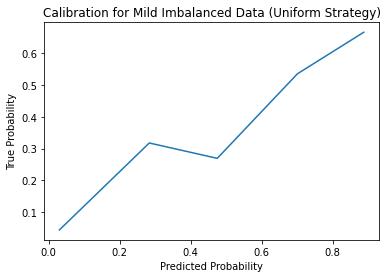

In [20]:
# Mild Imbalanced Dataset
prob_true, prob_pred = calibration_curve(y_test2,y_pred_proba2)

plt.plot(prob_pred,prob_true)
plt.title('Calibration for Mild Imbalanced Data (Uniform Strategy)')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.show()

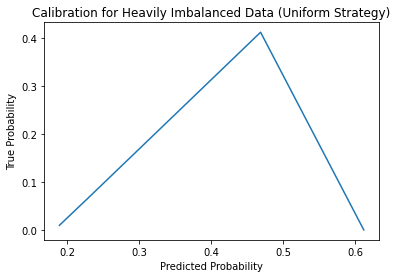

In [21]:
# Heavily Imbalanced Dataset
prob_true, prob_pred = calibration_curve(y_test3,y_pred_proba3)

plt.plot(prob_pred,prob_true)
plt.title('Calibration for Heavily Imbalanced Data (Uniform Strategy)')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.show()

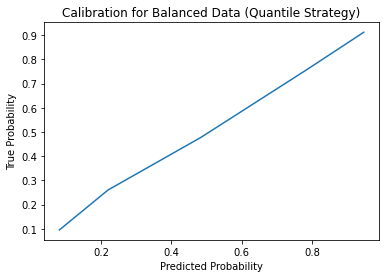

In [22]:
#Plot all calibration curves for strategy = 'quantile'
# Balanced Dataset
prob_true, prob_pred = calibration_curve(y_test1,y_pred_proba1,strategy='quantile')

plt.plot(prob_pred,prob_true)
plt.title('Calibration for Balanced Data (Quantile Strategy)')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.show()

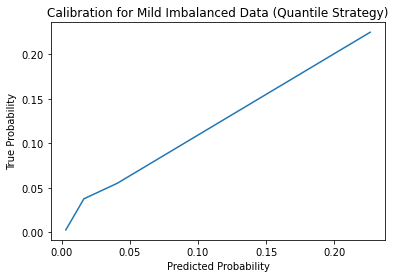

In [24]:
# Mild Imbalanced Dataset
prob_true, prob_pred = calibration_curve(y_test2,y_pred_proba2,strategy='quantile')

plt.plot(prob_pred,prob_true)
plt.title('Calibration for Mild Imbalanced Data (Quantile Strategy)')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.show()

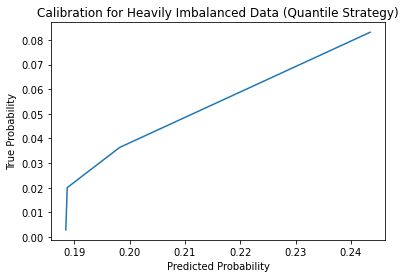

In [25]:
# Heavily Imbalanced Dataset
prob_true, prob_pred = calibration_curve(y_test3,y_pred_proba3,strategy='quantile')

plt.plot(prob_pred,prob_true)
plt.title('Calibration for Heavily Imbalanced Data (Quantile Strategy)')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.show()

#Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) **[2.5 pts]** Skip connections <br>
b) **[2.5 pts]** Batch normalization

#Answer:

# a. Skip connections 

In Neural Nets, the output from one layer usually feeds input of the next layer and so on. We need to understand that during backpropgation the gradient of the weights at a certain layer might get close to zero and the subsequent weights are dependent on it, the overall learning of the model will be effected if any of the weights approach towards zero. This problem can be solved using the skip connections where the skip connections in deep architecture bypass some of the neural network layers and feed the output of one layer as the input to the following layers. It is a standard module and provides an alternative path for the gradient with backpropagation

# b. Batch normalization


Training deep neural networks with multiple layers is challenging as they are sensitive to the initial random weights and its configuration. One possible reason for this difficulty is the distribution of the inputs to layers deep in the network may change after each mini-batch when the weights are updated. This can cause the learning algorithm to forever chase a moving target. This change in the distribution of inputs to layers in the network is referred to the technical name internal covariate shift.
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.